# 03 — Ecualización de histograma (Gris y Color) con OpenCV

En este notebook aplicamos **ecualización de histograma** para mejorar el contraste de imágenes:
- **Escala de grises** con `cv2.equalizeHist`.
- **Color** con **CLAHE** sobre la luminancia (espacio **LAB**).

> **Por qué es útil en robótica**  
> - Mejora la visibilidad de bordes y texturas en escenas con iluminación irregular.  
> - Facilita detección/seguimiento de líneas, obstáculos y características para SLAM/odometría visual.  
> - En inspección visual, resalta defectos superficiales al ampliar el rango dinámico perceptible.


In [22]:
# ✅ Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ✅ Cargar imagen
img_bgr = cv2.imread(r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\barco.png")  # Cambia la ruta según tu estructura

if img_bgr is None:
    raise FileNotFoundError("No se pudo cargar la imagen. Verifica la ruta.")
print("✅ Imagen cargada:", img_bgr.shape, img_bgr.dtype)


✅ Imagen cargada: (462, 701, 3) uint8


## Ecualización en escala de grises (`cv2.equalizeHist`)

1. Convertimos la imagen BGR a **gris**.  
2. Aplicamos **ecualización global** con `cv2.equalizeHist`.  
3. Comparamos imagen e **histogramas** antes y después.


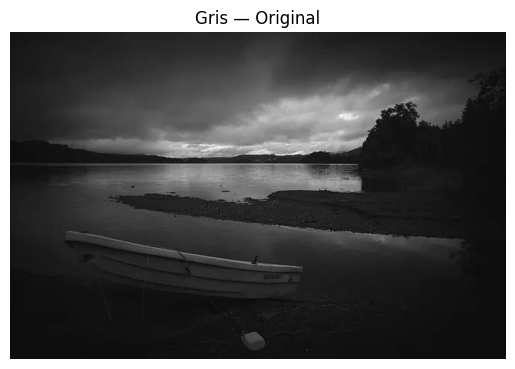

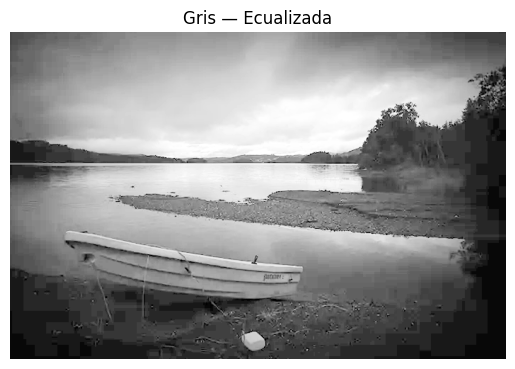

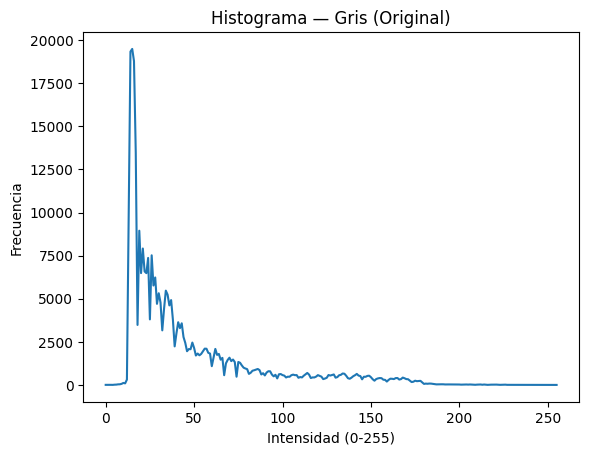

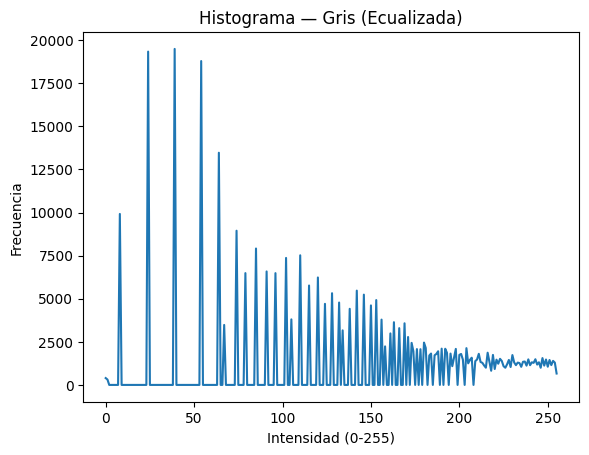

In [23]:
# Convertir a gris
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Ecualización global
img_gray_eq = cv2.equalizeHist(img_gray)

# Mostrar imágenes 
plt.imshow(img_gray, cmap='gray')
plt.title("Gris — Original")
plt.axis("off")
plt.show()

plt.imshow(img_gray_eq, cmap='gray')
plt.title("Gris — Ecualizada")
plt.axis("off")
plt.show()

# Histogramas 
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist_gray)
plt.title("Histograma — Gris (Original)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia")
plt.show()

hist_gray_eq = cv2.calcHist([img_gray_eq], [0], None, [256], [0, 256])
plt.plot(hist_gray_eq)
plt.title("Histograma — Gris (Ecualizada)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia")
plt.show()


**Interpretación (gris):**  
- El histograma **original** puede estar concentrado en una región estrecha (bajo contraste).  
- La ecualización **redistribuye** intensidades para ocupar más el rango 0–255, aumentando el **contraste**.  
- Útil cuando la escena está subexpuesta/sobreexpuesta o con iluminación no uniforme.


## Ecualización en color con **CLAHE** sobre el canal de luminancia (LAB)

- En color, **no** se recomienda ecualizar R/G/B por separado.  
- Convertimos BGR → **LAB**, aplicamos **CLAHE** al canal **L** (luminancia) y reconstruimos la imagen.
- **CLAHE** (Contrast Limited Adaptive Histogram Equalization) limita la amplificación del ruido y opera por **bloques**.


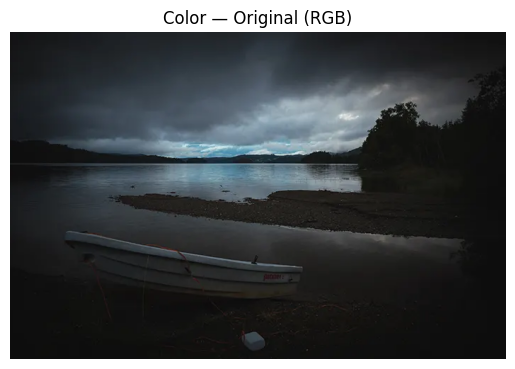

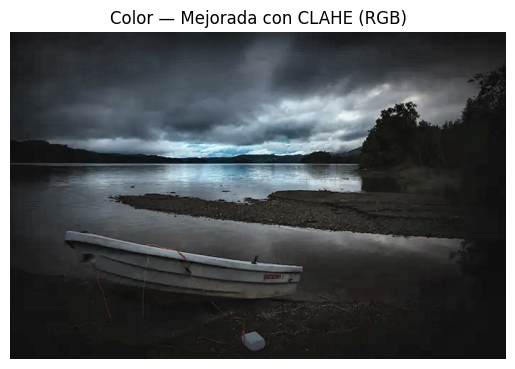

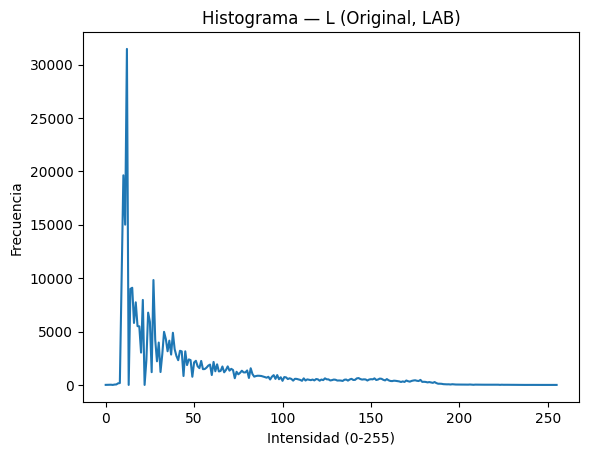

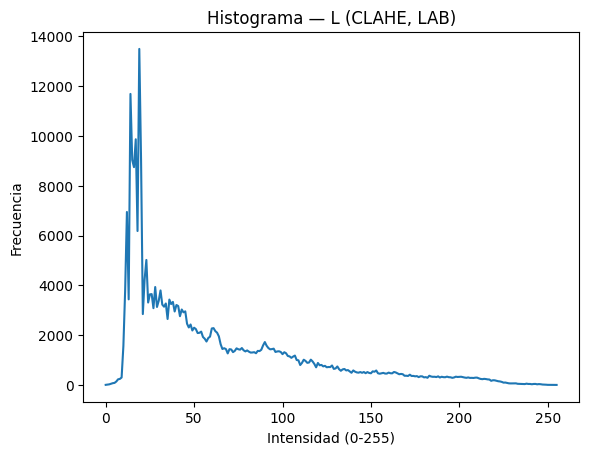

In [24]:
# Convertir a LAB y separar canales
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(img_lab)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Ajustable

# Aplicar CLAHE a L
L_eq = clahe.apply(L)

# Combinar canales y regresar a BGR
img_lab_eq = cv2.merge([L_eq, A, B])
img_bgr_eq = cv2.cvtColor(img_lab_eq, cv2.COLOR_LAB2BGR)

# Mostrar imágenes en RGB para Matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb_eq = cv2.cvtColor(img_bgr_eq, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Color — Original (RGB)")
plt.axis("off")
plt.show()

plt.imshow(img_rgb_eq)
plt.title("Color — Mejorada con CLAHE (RGB)")
plt.axis("off")
plt.show()

# Histogramas del canal L antes/después 
hist_L = cv2.calcHist([L], [0], None, [256], [0, 256])
plt.plot(hist_L)
plt.title("Histograma — L (Original, LAB)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia")
plt.show()

hist_L_eq = cv2.calcHist([L_eq], [0], None, [256], [0, 256])
plt.plot(hist_L_eq)
plt.title("Histograma — L (CLAHE, LAB)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia")
plt.show()


**Interpretación (color/CLAHE):**  
- El histograma del canal **L** (luminancia) se **expande** y suaviza localmente, mejorando detalles en sombras y luces.  
- A diferencia de la ecualización global, **CLAHE** evita saturar demasiado zonas brillantes y **limita ruido** en regiones oscuras.  
- En robótica, esto estabiliza la percepción en entornos con **alto rango dinámico** (exterior con sombras/sol, interiores con reflejos, etc.).


### Guardado de resultados

Se guardarán versiones procesadas **en la misma carpeta** de la imagen original, agregando sufijos al nombre del archivo.


In [25]:
import os

# Ruta original (misma que al cargar)
img_path = r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png"
carpeta = os.path.dirname(img_path)
nombre, ext = os.path.splitext(os.path.basename(img_path))

# Construir rutas de salida
ruta_gray_eq = os.path.join(carpeta, f"{nombre}_gray_eq{ext}")
ruta_color_eq = os.path.join(carpeta, f"{nombre}_clahe{ext}")

# Guardar
cv2.imwrite(ruta_gray_eq, img_gray_eq)
cv2.imwrite(ruta_color_eq, img_bgr_eq)

print("✅ Guardado:", ruta_gray_eq)
print("✅ Guardado:", ruta_color_eq)


✅ Guardado: C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna_gray_eq.png
✅ Guardado: C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna_clahe.png
